In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


# Upload Dataset

In [85]:
df = pd.read_csv('./gld_price_data.csv')

In [86]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [87]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [88]:
df.shape

(2290, 6)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [90]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [91]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation of Different variables

In [92]:
correlation = df.corr()

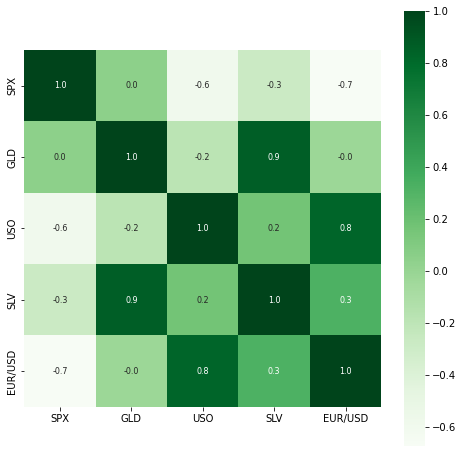

In [93]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',
            
    annot=True, annot_kws={'size':8}, cmap='Greens')
plt.show()

In [94]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


# Show gold prices

C:\Users\muxair\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


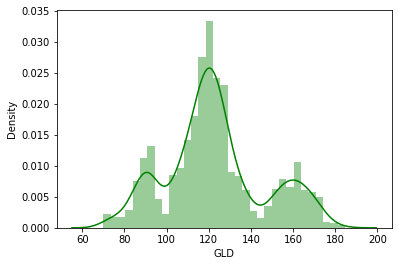

In [95]:
sns.distplot(df['GLD'], color='green')
plt.show();

# Seperate independent and dependent features

In [97]:
X = df.drop(['Date', 'GLD'],axis=1)
Y = df['GLD']

In [59]:
# cols = ['SPX','USO', 'SLV', 'EUR/USD']

In [62]:
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# X = mm.fit_transform(X)
# X = pd.DataFrame(df_mm, columns=cols)

In [98]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [99]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# Splitting Training and Testing data

In [101]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=2)

# Training Models

In [102]:
RF_model = RandomForestRegressor(n_estimators=100, max_depth=10)

In [103]:
RF_model.fit(X_train,Y_train)

RandomForestRegressor(max_depth=10)

In [104]:
X_train_pred = RF_model.predict(X_train)
X_train_acc = metrics.r2_score(Y_train, X_train_pred)
print('R Square Error on training data  : ',X_train_acc)

R Square Error on training data  :  0.9979575689018323


In [105]:
X_test_pred = RF_model.predict(X_test)
X_test_acc = metrics.r2_score(Y_test, X_test_pred)
print("R squared Error on testing data : ",X_test_acc)

R squared Error on testing data :  0.9893482182932142


In [106]:
Y_test = list(Y_test)

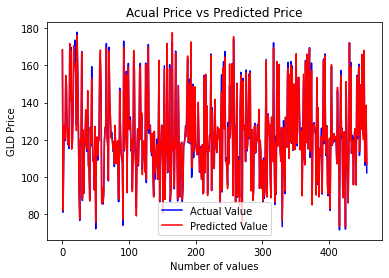

In [107]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(X_test_pred, color='red', label='Predicted Value')
plt.title('Acual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

# Test Model 

In [122]:
# test = np.array([[1447.160034,  78.470001,  15.1800,  1.471692]])
# test = np.array([[1447.160034, 78.470001, 15.180, 1.471692]])
# test = np.array([[1447.160034,  78.470001,  15.1800,  1.471692]])
test = np.array([[1447.160034,  78.370003,  15.2850,  1.474491]])

X_test_pred = RF_model.predict(test)
print("Price is  : ",X_test_pred)

Price is  :  [85.31116176]


C:\Users\muxair\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


# Train Linear Model

In [123]:
from sklearn.linear_model import LinearRegression

In [124]:
lr_model = LinearRegression()

In [125]:
lr_model.fit(X_train, Y_train)

LinearRegression()

In [127]:
lr_X_train_pred = lr_model.predict(X_train)
lr_X_RSE = metrics.r2_score(Y_train, lr_X_train_pred)
print("RSE of training data : ", lr_X_RSE)

RSE of training data :  0.8850695972446934


In [137]:
lr_X_test_pred = lr_model.predict(X_test)

lr_X_RSE = metrics.r2_score(Y_test, lr_X_test_pred)
print("RSE of training data : ", lr_X_RSE)

RSE of training data :  0.8657886565869237


# Test Linear Model

In [138]:
# test = np.array([[1447.160034,  78.470001,  15.1800,  1.471692]])
# test = np.array([[1447.160034, 78.470001, 15.180, 1.471692]])
# test = np.array([[1447.160034,  78.470001,  15.1800,  1.471692]])
test = np.array([[1447.160034,  78.370003,  15.2850,  1.474491]])

lr_test_pred = lr_model.predict(test)
print("Price is  : ",lr_test_pred)

Price is  :  [92.50844827]


C:\Users\muxair\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [139]:
print(lr_X_test_pred)

[159.45290968  81.50858067 113.4868037  128.55153817 126.20403783
 141.31818338 165.49416492 124.44197659 113.95389904 122.9965895
 113.95492464 174.89529849 132.66890174 159.24793304 118.8791679
 122.14315717 150.37153054 161.27175405 152.2792036  162.19946709
 145.88372183 118.07669395 180.21729122 178.13331554 123.51701986
  98.82914322  76.63486248 119.38435511 113.85027665 159.25706609
  93.76037617 120.05334649  88.61086583 114.28801659 112.77954274
 144.19518102 118.78252489 115.87334354 144.06409553 113.81864246
 100.49676727  89.42842238 120.36720699 110.47635305 146.4894628
 119.30321261 110.99311348 111.3386287   96.48139076 123.40842816
  79.51413425 115.36111603 121.78896764 114.55367722 120.9074622
 117.10612464 152.31198525 182.7735091  196.73570503  91.06670951
 101.92097594  87.48443506  94.33158785 119.17357764 121.8935122
 125.85678089 163.2699701  122.91100556 113.55098736 104.06905043
 155.16775229 176.87972077 125.62460858 113.85896766 119.69577146
 120.03159609 1

# Plot Actual and Predicted value 

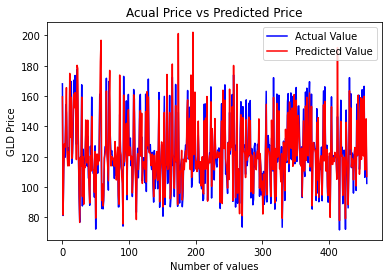

In [140]:
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(lr_X_test_pred, color='red', label='Predicted Value')
plt.title('Acual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()